In [16]:
import time
import re
import bisect

import numpy as np

from dasly.master import Dasly
from dasly.simpledas import simpleDASreader
from dasly import loader

In [17]:
folder_path = '/mnt/Datastore/usr/kptruong/dasly_repo/data/svalbard'
start = '20220822 122539'
duration = 30

In [18]:
s_rate = 0.25
das = Dasly()
das.load_data(
    folder_path=folder_path,
    start=start,
    duration=duration,
    start_exact_second=False,
    integrate=True,
    chIndex=np.arange(round(5000 * s_rate), round(90000 * s_rate))
)

3 files, from 122539 to 122559


In [19]:
start_time = time.time()
das.bandpass_filter(15, 25)
time_bandpass = time.time()
print(f'time_bandpass: {time_bandpass - start_time}')

Signal updated with band-pass filter.


time_bandpass: 3.1404037475585938


vmin: -2.18e-10, vmax: 2.18e-10


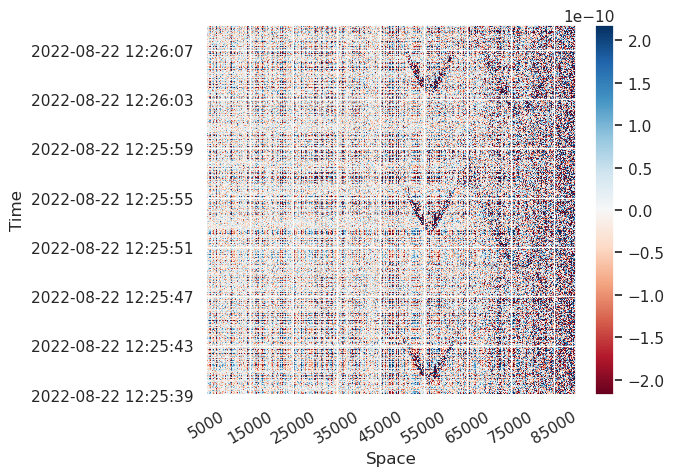

In [20]:
das.heatmap(xticks_rotate=30)

time_abs: 0.6949729919433594


vmax: 2.18e-10


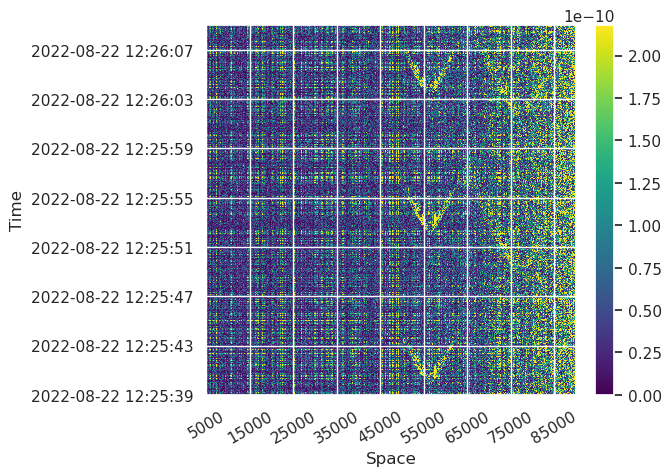

In [21]:
start_time = time.time()
das.signal = np.abs(das.signal)
time_abs = time.time()
print(f'time_abs: {time_abs - start_time}')
das.heatmap(xticks_rotate=30)

Signal updated with new temporal sampling rate 25 and new spatial sampling rate 0.010.
vmax: 1.41e-10


time_sample: 30.983947277069092


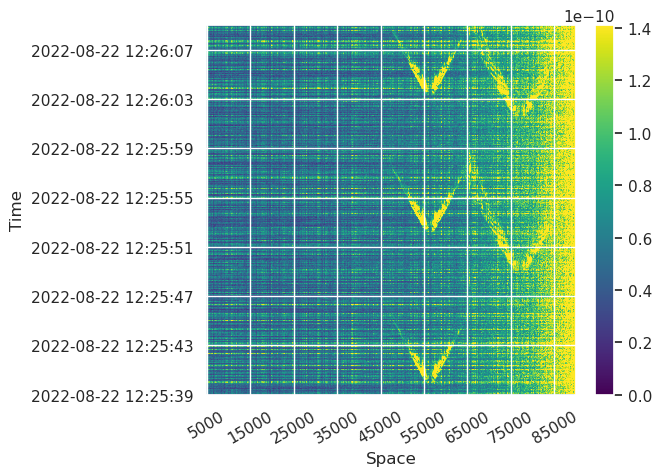

In [22]:
das.sample(meters=100, seconds=1/25)
time_sample = time.time()
print(f'time_sample: {time_sample - time_abs}')
das.heatmap(xticks_rotate=30)

In [23]:
# das.gaussian_smooth(-1500.01, -1500, unit='m/s', std_s=500)
# time_gauss = time.time()
# print(f'time_gauss: {time_gauss - time_sample}')
# das.heatmap(xticks_rotate=30)

Signal updated with Sobel filter.
vmax: 1.67e-10


time_sobel: 0.4153099060058594


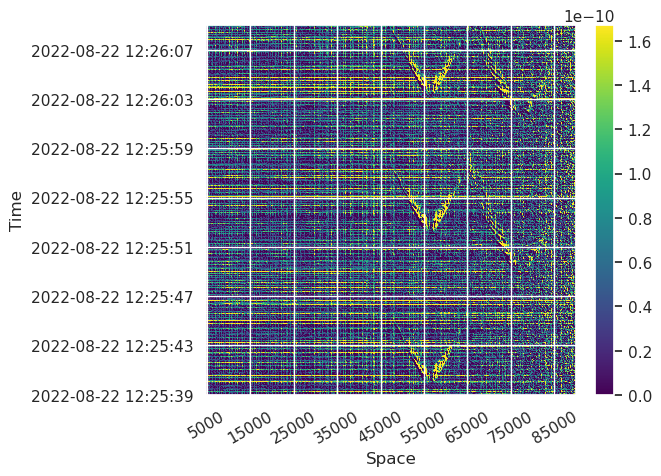

In [24]:
das.sobel_filter(pos_grads=True)
time_sobel = time.time()
print(f'time_sobel: {time_sobel - time_sample}')
das.heatmap(xticks_rotate=30)

Signal updated with binary transform with threshold 1.67e-10.


time_binary: 0.3669133186340332


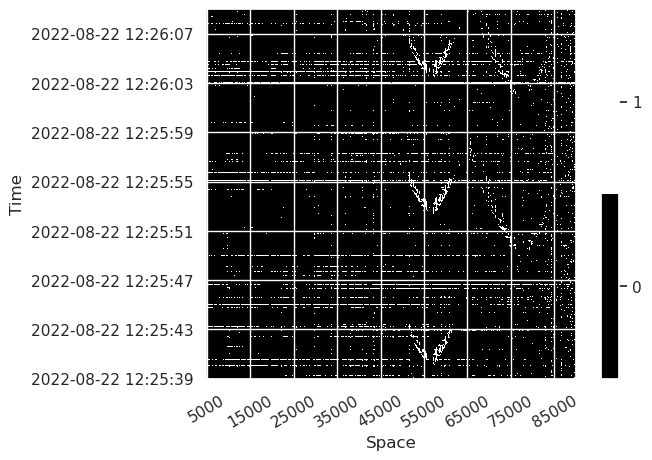

In [25]:
das.binary_transform(quantile=0.95)
time_binary = time.time()
print(f'time_binary: {time_binary - time_sobel}')
das.heatmap(xticks_rotate=30)

318 lines are detected.


time_hough: 147.26053929328918


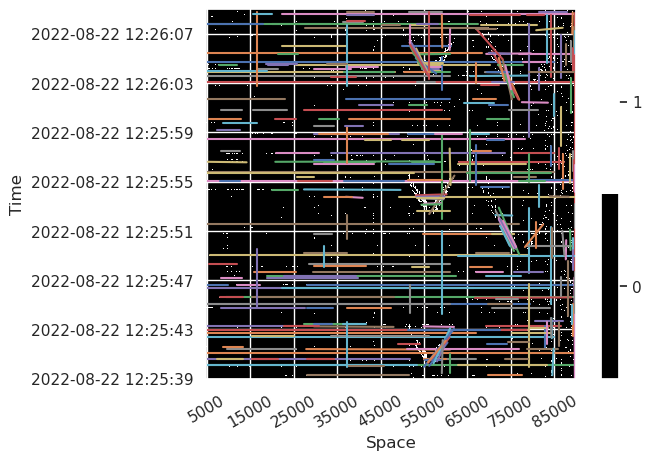

In [33]:
das.hough_transform(
    target_speed=(1500+1500.01)/2,
    speed_res=10,
    length_meters=2000,
    threshold_percent=0.5,
    max_line_gap_percent=0.4,
    speed_unit='m/s',    
)
time_hough = time.time()
print(f'time_hough: {time_hough - time_binary}')
das.heatmap(xticks_rotate=30)

time_dbscan: 10.35002088546753


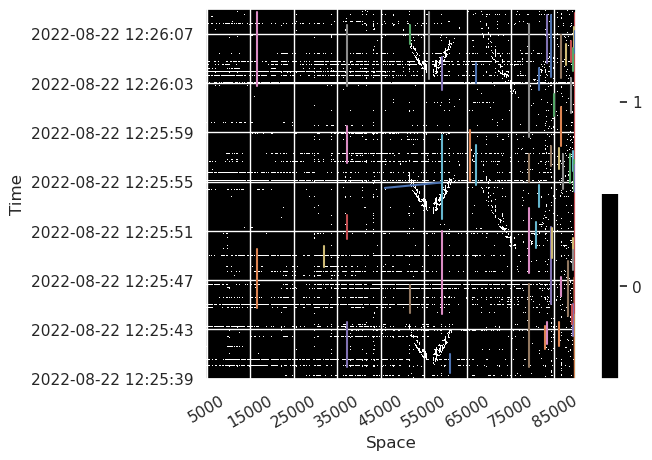

In [34]:
das.dbscan(eps_seconds=3)
time_dbscan = time.time()
print(f'time_dbscan: {time_dbscan - time_hough}')
das.heatmap(xticks_rotate=30)

In [22]:
das.lines_df

,speed_kmh,speed_ms,s,t,s1,t1,s2,t2,s1_edge,t1_edge,...,x1,y1,x2,y2,x1_edge,y1_edge,x2_edge,y2_edge,y1_edge_ext,y2_edge_ext
0,-5215.909091,-1448.863636,-5100.0,3.52,56400.0,2022-08-22 12:26:03.320,51300.0,2022-08-22 12:26:06.840,89900.000000,2022-08-22 12:25:40.198431373,...,514.0,608.0,463.0,696.0,849.000000,29.960784,432.284091,749.000000,1494.901961,29.960784
1,-4677.165354,-1299.212598,-6600.0,5.08,76800.0,2022-08-22 12:25:49.280,70200.0,2022-08-22 12:25:54.360,89900.000000,2022-08-22 12:25:39.196969697,...,718.0,257.0,652.0,384.0,849.000000,4.924242,462.314961,749.000000,1638.606061,4.924242
2,-4852.941176,-1348.039216,-5500.0,4.08,76700.0,2022-08-22 12:26:02.040,71200.0,2022-08-22 12:26:06.120,89900.000000,2022-08-22 12:25:52.248000000,...,717.0,576.0,662.0,678.0,849.000000,331.200000,623.715686,749.000000,1905.709091,331.200000
3,-5538.461538,-1538.461538,-5600.0,3.64,56200.0,2022-08-22 12:25:52.400,50600.0,2022-08-22 12:25:56.040,76815.384615,2022-08-22 12:25:39.000000000,...,512.0,335.0,456.0,426.0,718.153846,0.000000,257.230769,749.000000,1167.000000,-212.625000
4,-4837.500000,-1343.750000,-4300.0,3.20,56500.0,2022-08-22 12:25:40.000,52200.0,2022-08-22 12:25:43.200,57843.750000,2022-08-22 12:25:39.000000000,...,515.0,25.0,472.0,105.0,528.437500,0.000000,125.850000,749.000000,983.139535,-596.395349
5,8538.461538,2371.794872,7400.0,3.12,82400.0,2022-08-22 12:26:04.280,89800.0,2022-08-22 12:26:07.400,22441.025641,2022-08-22 12:25:39.000000000,...,774.0,632.0,848.0,710.0,174.410256,0.000000,849.000000,711.054054,-183.837838,711.054054
